In [1]:
import sys

sys.path.append("../../src")

In [2]:
from copy import deepcopy
from itertools import islice
from pathlib import Path
from typing import Any

import cv2
import IPython
import numpy as np
import onnxruntime as nx
import torch
import torch.nn as nn
from torchvision import transforms
from ultralytics import YOLO

from traffic_sign_detector import TrafficSignDetector

In [3]:
inference_data = Path("../../test_images/")

In [4]:
images = [
    cv2.imread(str(filename)) for filename in list(islice(inference_data.iterdir(), 5))
]

In [5]:
def plot_detection_result(image: np.ndarray, bboxes) -> np.ndarray:
    for bbox in bboxes:
        cv2.rectangle(image, bbox[:2], bbox[2:4], (255, 255, 0), 3)
        cv2.putText(
            image,
            f"{bbox[4]}:{bbox[5]}",
            (bbox[0], bbox[1] - 10),
            cv2.FONT_HERSHEY_SIMPLEX,
            0.9,
            (255, 255, 0),
            2,
        )
    _, ret = cv2.imencode(".jpg", image)
    img = IPython.display.Image(data=ret)
    IPython.display.display(img)

Инференс с ONNX runtime

In [7]:
detector = TrafficSignDetector("../../src/best.onnx")

(['images'], 640, 480)


[{'bbox': [846.0232543945312, 551.4203491210938, 884.6053466796875, 588.6072998046875], 'score': 0.6986686587333679, 'class': '5_20'}, {'bbox': [1521.2420654296875, 532.99951171875, 1556.3968505859375, 573.1256103515625], 'score': 0.5414431691169739, 'class': '5_20'}, {'bbox': [1204.1114501953125, 562.6802978515625, 1233.0689697265625, 590.965576171875], 'score': 0.33885952830314636, 'class': '5_20'}]


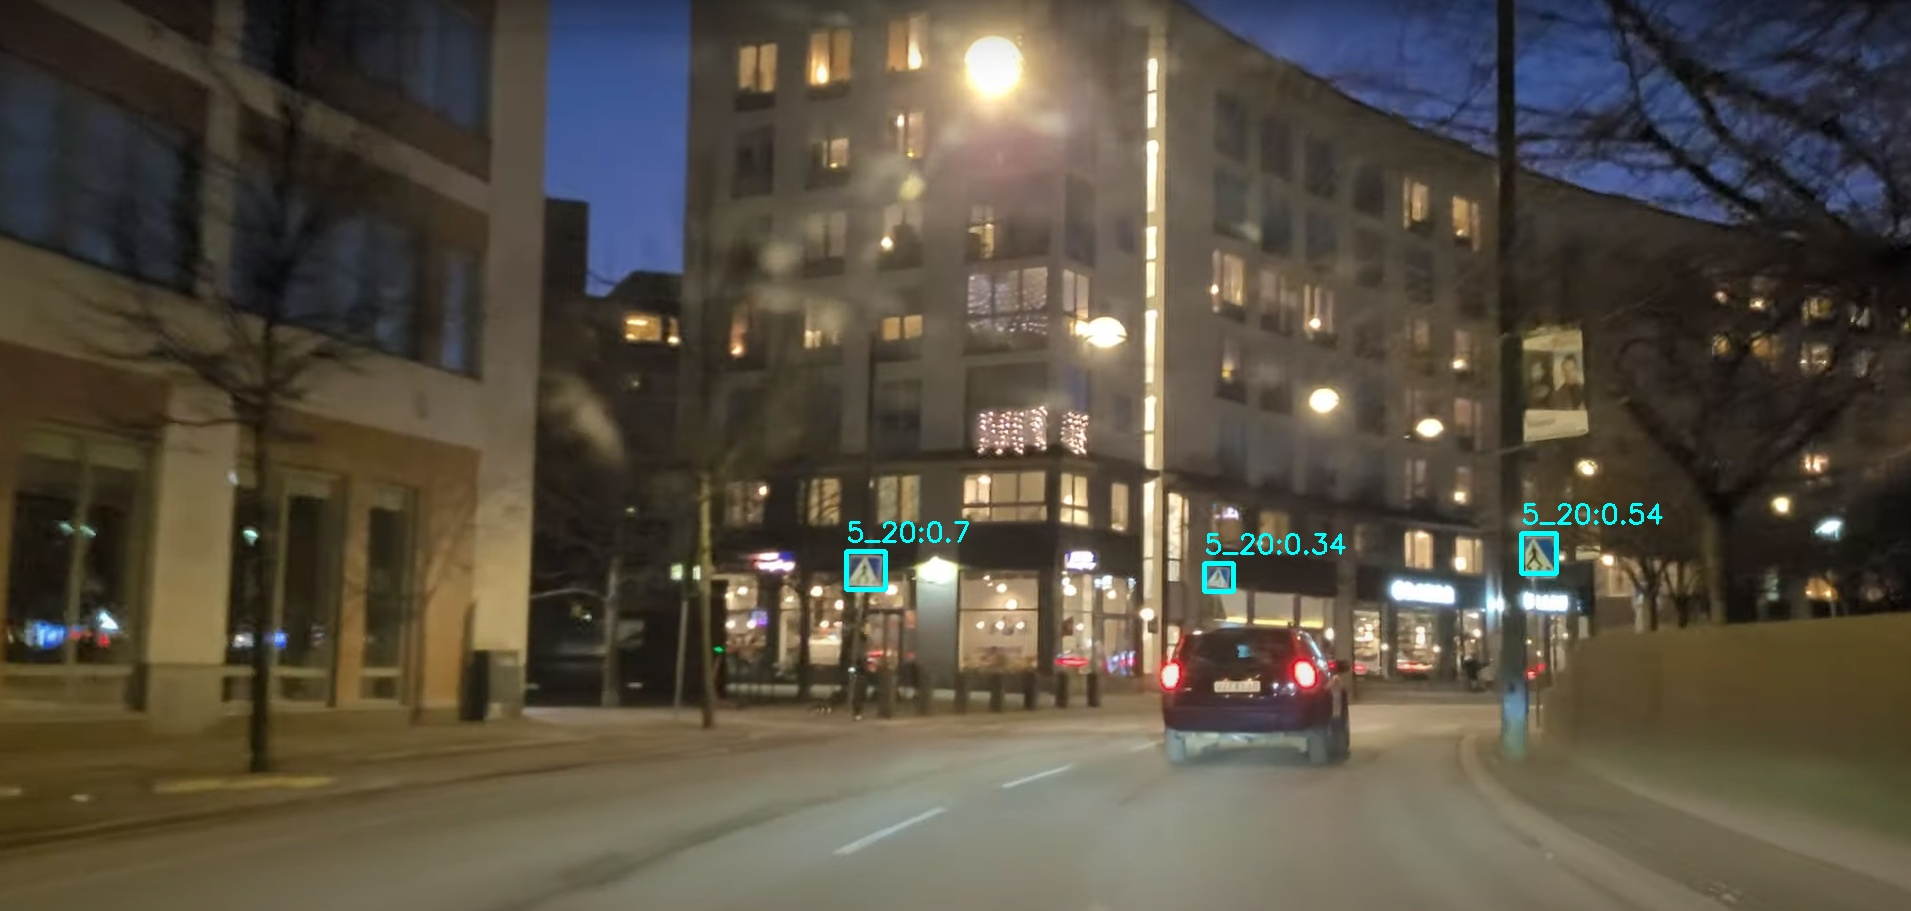

[{'bbox': [486.9145812988281, 350.87591552734375, 612.943603515625, 479.9234924316406], 'score': 0.4345020651817322, 'class': '8_13_1'}, {'bbox': [1421.0955810546875, 441.8286437988281, 1487.903076171875, 509.0701904296875], 'score': 0.4688138961791992, 'class': '5_15_5'}, {'bbox': [487.1071472167969, 352.2361755371094, 613.7769165039062, 479.6990051269531], 'score': 0.6963914036750793, 'class': '3_10'}]


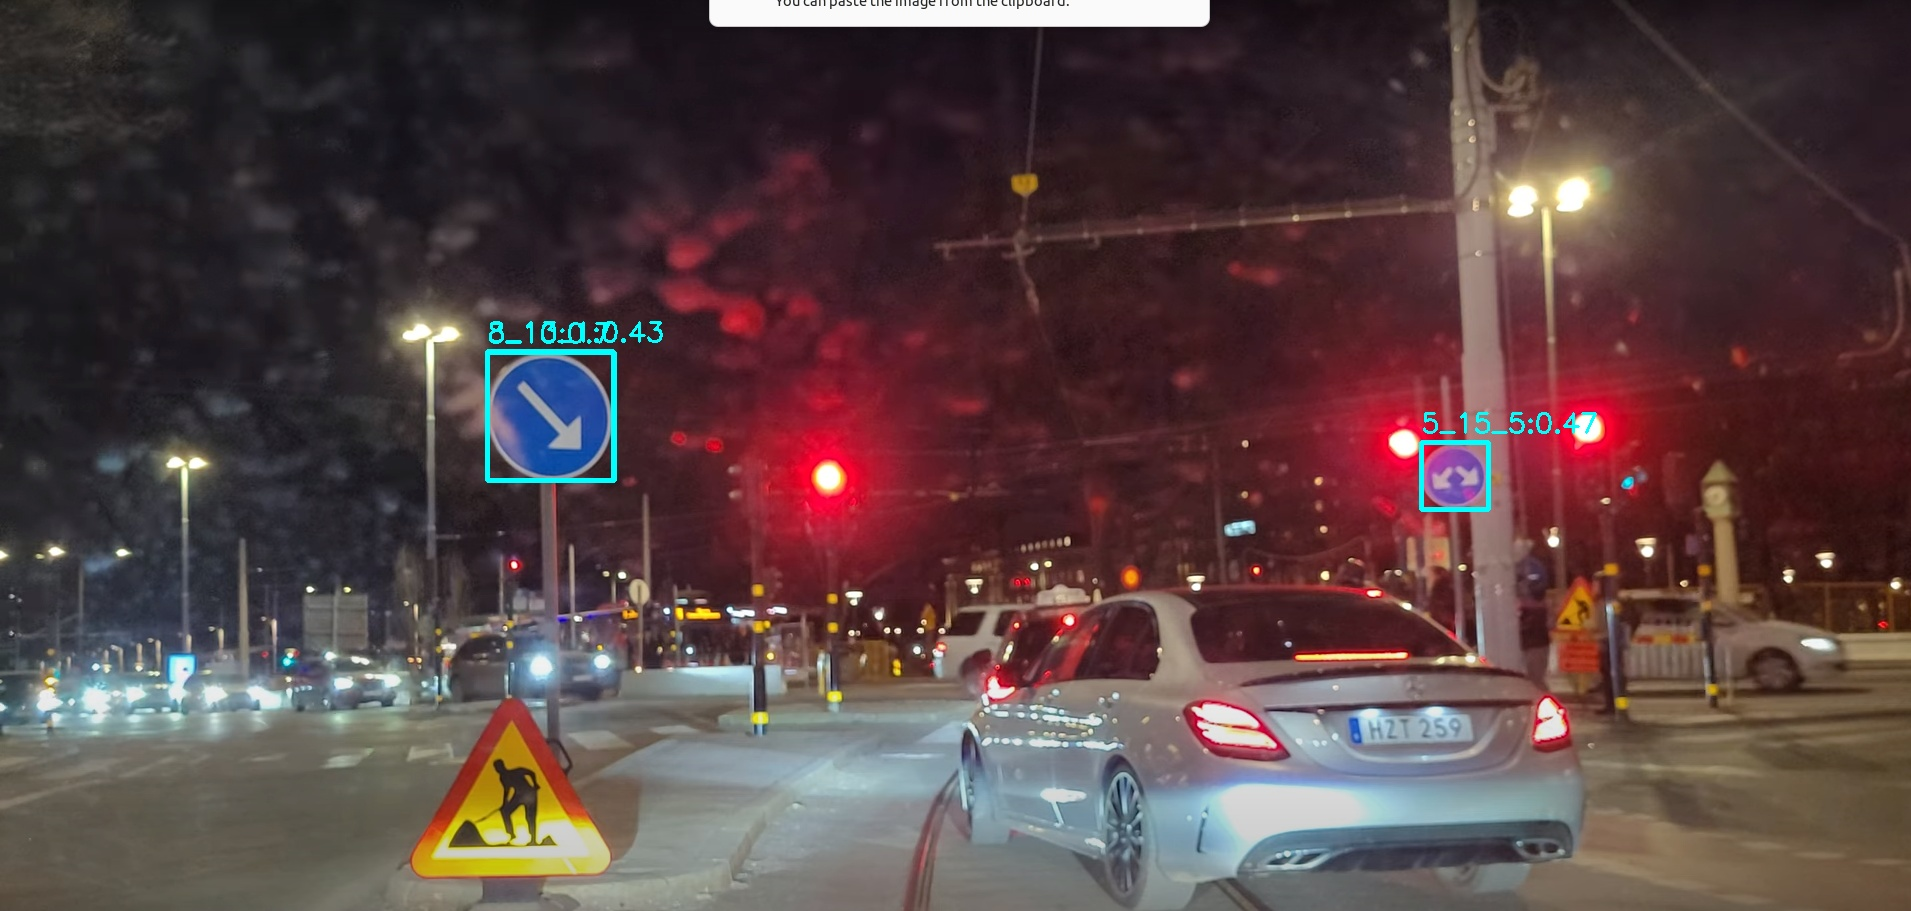

[{'bbox': [1427.6297607421875, 411.7942199707031, 1520.2757568359375, 502.36376953125], 'score': 0.8884454965591431, 'class': '1_17'}, {'bbox': [362.66217041015625, 407.6253967285156, 465.7964782714844, 509.1998596191406], 'score': 0.7651479244232178, 'class': '1_17'}, {'bbox': [1026.264404296875, 600.28271484375, 1087.2115478515625, 654.5712280273438], 'score': 0.4047698378562927, 'class': '4_1_1'}, {'bbox': [1025.9112548828125, 600.2466430664062, 1087.12841796875, 654.3370361328125], 'score': 0.2714180052280426, 'class': '1_27'}, {'bbox': [1438.1171875, 502.73956298828125, 1518.8609619140625, 540.948974609375], 'score': 0.31892335414886475, 'class': '3_19'}]


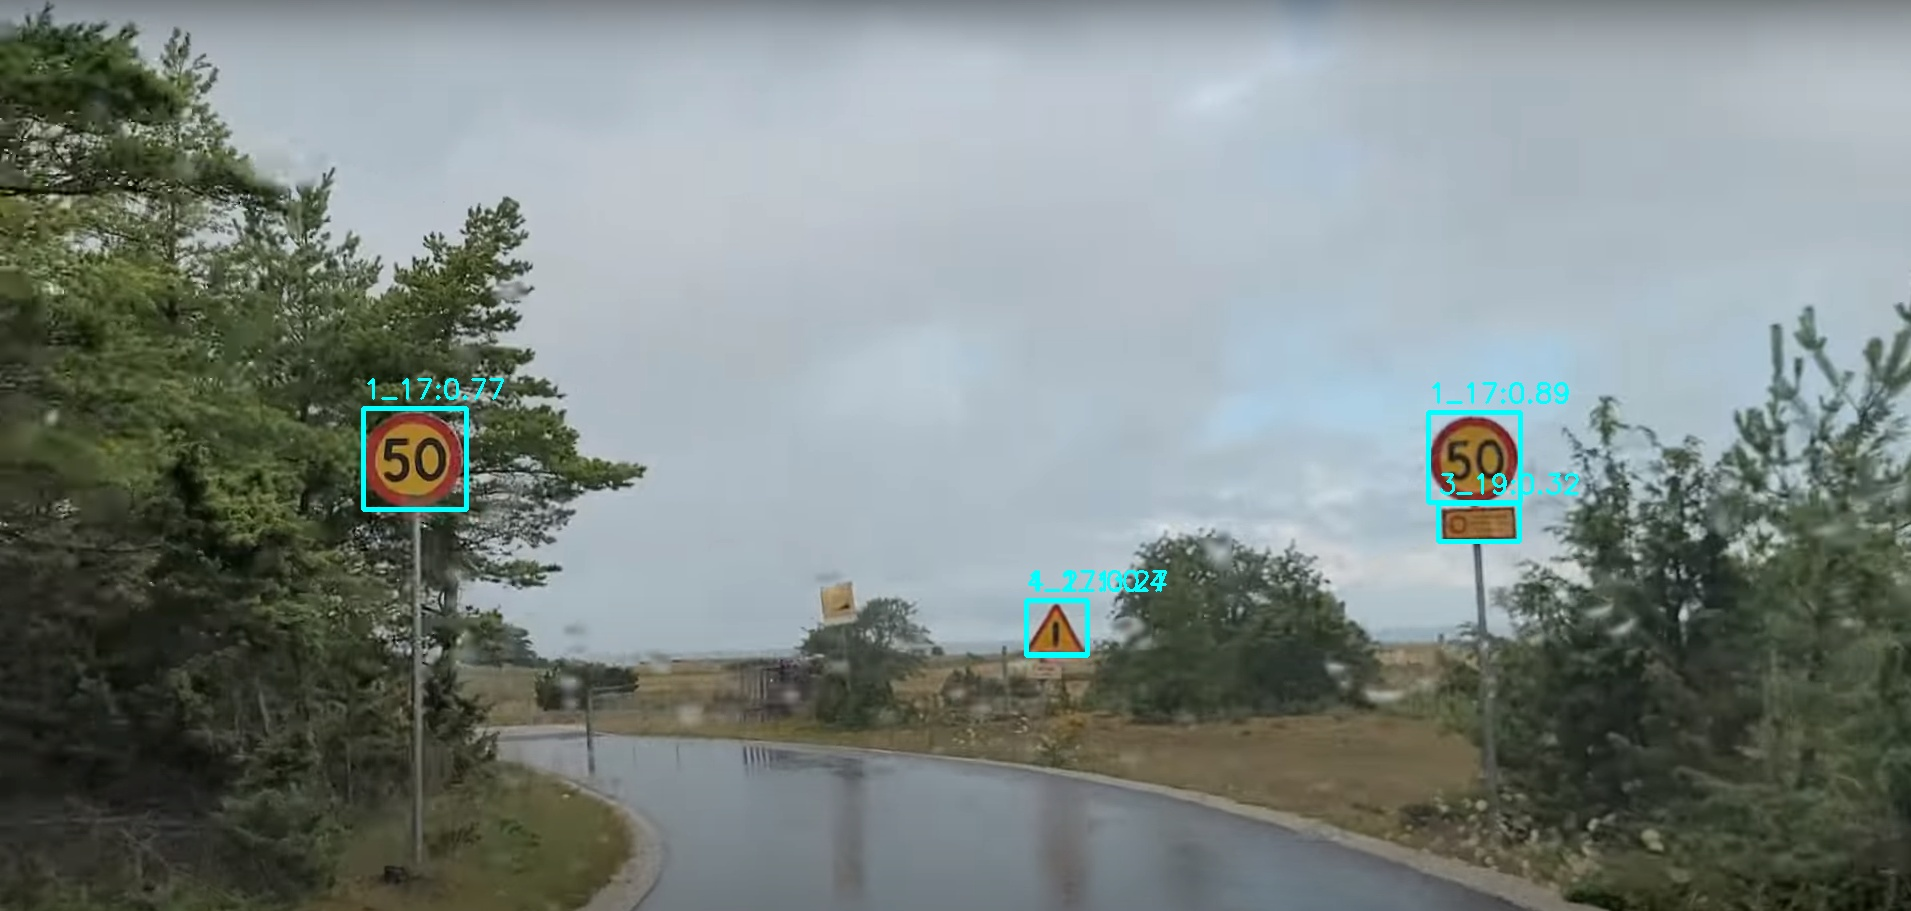

In [8]:
for img in images:
    predictions = detector(img)
    outputs = []
    for prediction in predictions:
        box = prediction["bbox"]
        x1, y1, x2, y2 = [round(x) for x in box]
        class_name = prediction["class"]
        prob = round(prediction["score"], 2)
        outputs.append([x1, y1, x2, y2, class_name, prob])
    plot_detection_result(deepcopy(img), outputs)